<a href="https://colab.research.google.com/github/monicaorduz/tutoriales/blob/master/Copia_de_Matplotlib_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

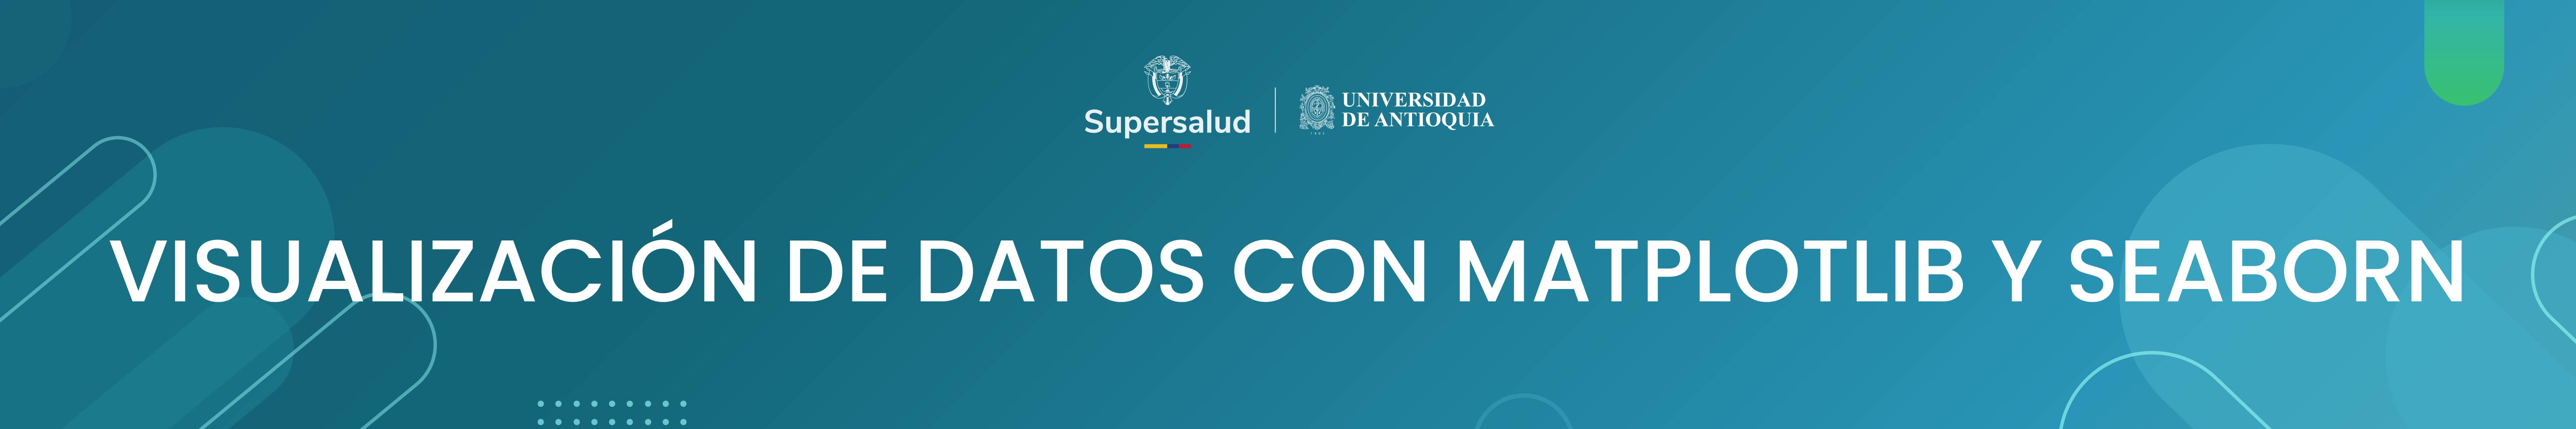

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

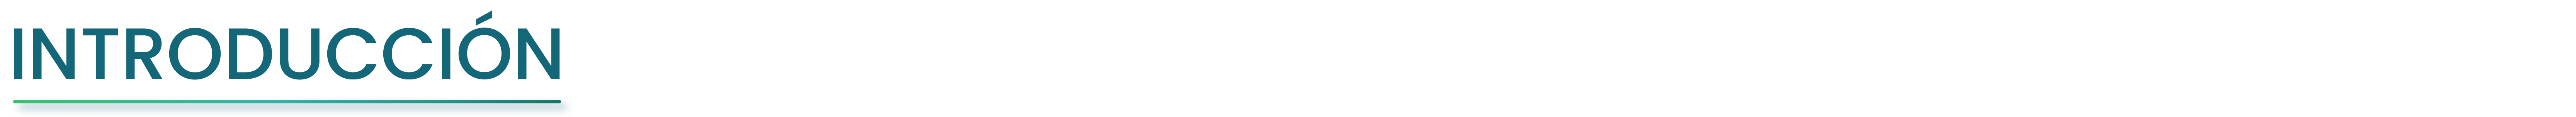

En el análisis de datos no basta con calcular indicadores; también es fundamental **comunicar los hallazgos de forma clara**. Para esto se usa dos librerías ampliamente utilizadas en Python:

- **Matplotlib**: la base de la visualización en Python.  
  Ofrece control detallado sobre cada elemento de la gráfica (figura, ejes, escalas, anotaciones). Es ideal para reportes y visualizaciones reproducibles.

- **Seaborn**: se construye sobre Matplotlib y facilita la creación de **gráficos estadísticos** (distribuciones, comparaciones entre categorías, relaciones).  
  Su fortaleza está en la **simplicidad y estética coherente**.

## <font color='#2184A1'>¿Cuándo usar cada librería?</font>

| Situación | Matplotlib | Seaborn |
|---|---|---|
| Quiere control absoluto de cada elemento (ejes, ticks, anotaciones, layouts) | $\checkmark$ | |
| Necesita figuras para reportes oficiales (personalización al detalle) | $\checkmark$ | |
| Busca crear rápidamente gráficos estadísticos (boxplots, violinplots, heatmaps) | | $\checkmark$ |
| Desea un estilo estético y consistente sin configurar mucho | | $\checkmark$ |


### <font color='#2184A1'>Ejemplo</font>

Para cargar la libreria ``matplotlib.pyplot`` y con el alias de `plt`, el siguiente ejemplo muestra como cargar y un ejemplo de una línea


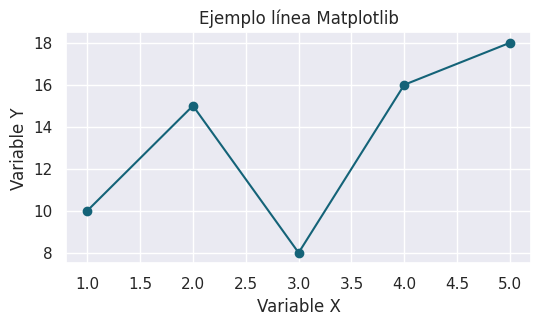

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,3))
sns.set_theme(context="notebook")
ax.plot([1,2,3,4,5], [10,15,8,16, 18], marker="o", color='#146378')
ax.set(title="Ejemplo línea Matplotlib", xlabel="Variable X", ylabel="Variable Y")
plt.show()

También la carga de la libería ``seaborn`` la cual tiene un alias de 'sns', en la cual se muestra unas categorias que se clasifican por letras mayúsculas y unos valores de frecuencia de cada categoría

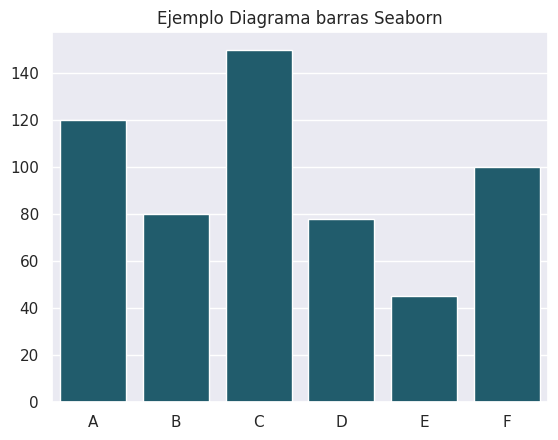

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(context="notebook")
sns.barplot(x=["A","B","C", "D","E","F"], y=[120, 80, 150, 78, 45, 100], color='#146378')
plt.title("Ejemplo Diagrama barras Seaborn")
plt.show()

Para el resto del documento se trabaja con algunas variables de la base de datos abiertas de la superintendecia de Sanciones, en este caso se consideraron solo las variables RAZON_SOCIAL, DANE_DEP, TIPO_ACCION, TIPO_SANCION, VALOR_REPSC, VALOR_FINAL. Con los datos limpios

In [ ]:
df=pd.read_csv('/content/Sanciones_-_CSV.csv', sep=';', encoding='latin1')
df_alg=df[['FECHA_RESOLUCION','RAZON_SOCIAL', 'DANE_DEP', 'TIPO_ACCION', 'TIPO_SANCION', 'VALOR_REPSC', ' VALOR_FINAL ']]
df_alg.head()

,FECHA_RESOLUCION,RAZON_SOCIAL,DANE_DEP,TIPO_ACCION,TIPO_SANCION,VALOR_REPSC,VALOR_FINAL
0,8/08/2018,EMSSANAR,NARIÑO,SANCION,MULTA,$ 54.686.940,$ 54.686.940
1,8/08/2018,SALUDVIDA,"BOGOTÁ, D. C.",SANCION,MULTA,$ -,$ -
2,8/08/2018,ASOCIACION CENTRO DE CAPACITACION ESPECIAL CEN...,ATLÁNTICO,SANCION,MULTA,$ 15.624.840,$ 15.624.840
3,9/08/2018,CRUZ BLANCA,"BOGOTÁ, D. C.",SANCION,MULTA,$ 4.687.452,$ 4.687.452
4,9/08/2018,LOTERIA DEL QUINDIO,QUINDÍO,SANCION,MULTA,$ 8.593.662,$ 8.593.662


In [ ]:
df_alg.loc[:, 'VALOR_REPSC'] = df_alg['VALOR_REPSC'].str.replace('$', '', regex=False)
df_alg.loc[:, 'VALOR_REPSC'] = df_alg['VALOR_REPSC'].str.replace(',', '', regex=False)
df_alg.loc[:, 'VALOR_REPSC'] = df_alg['VALOR_REPSC'].str.replace('.', '', regex=False)
df_alg.loc[:, 'VALOR_REPSC'] = df_alg['VALOR_REPSC'].str.replace('-', '0', regex=False)
df_alg.loc[:, 'VALOR_REPSC'] = df_alg['VALOR_REPSC'].str.replace(' ', '0', regex=False)
df_alg.loc[:, 'VALOR_REPSC'] = df_alg['VALOR_REPSC'].astype(float)

df_alg.loc[:, ' VALOR_FINAL '] = df_alg[' VALOR_FINAL '].str.replace('$', '', regex=False)
df_alg.loc[:, ' VALOR_FINAL '] = df_alg[' VALOR_FINAL '].str.replace(',', '', regex=False)
df_alg.loc[:, ' VALOR_FINAL '] = df_alg[' VALOR_FINAL '].str.replace('.', '', regex=False)
df_alg.loc[:, ' VALOR_FINAL '] = df_alg[' VALOR_FINAL '].str.replace('-', '0', regex=False)
df_alg.loc[:, ' VALOR_FINAL '] = df_alg[' VALOR_FINAL '].str.replace(' ', '0', regex=False)
df_alg.loc[:, ' VALOR_FINAL '] = df_alg[' VALOR_FINAL '].astype(float)

df_alg['FECHA_RESOLUCION'] = pd.to_datetime(df_alg['FECHA_RESOLUCION'], format='%d/%m/%Y', errors='coerce')


/tmp/ipython-input-4043028852.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alg['FECHA_RESOLUCION'] = pd.to_datetime(df_alg['FECHA_RESOLUCION'], format='%d/%m/%Y', errors='coerce')


In [ ]:
df_alg.to_csv('df_alg.csv', index=False)

In [ ]:
df_alg

,FECHA_RESOLUCION,RAZON_SOCIAL,DANE_DEP,TIPO_ACCION,TIPO_SANCION,VALOR_REPSC,VALOR_FINAL
0,2018-08-08,EMSSANAR,NARIÑO,SANCION,MULTA,546869400.0,546869400.0
1,2018-08-08,SALUDVIDA,"BOGOTÁ, D. C.",SANCION,MULTA,0.0,0.0
2,2018-08-08,ASOCIACION CENTRO DE CAPACITACION ESPECIAL CEN...,ATLÁNTICO,SANCION,MULTA,156248400.0,156248400.0
3,2018-08-09,CRUZ BLANCA,"BOGOTÁ, D. C.",SANCION,MULTA,46874520.0,46874520.0
4,2018-08-09,LOTERIA DEL QUINDIO,QUINDÍO,SANCION,MULTA,85936620.0,85936620.0
...,...,...,...,...,...,...,...
660,2021-09-27,"ALCALDIA DE COGUA, CUNDINAMARCA",CUNDINAMARCA,SANCION,AMONESTACIÓN,0.0,0.0
661,2021-09-29,"ALCALDIA DE RICAURTE, CUNDINAMARCA",CUNDINAMARCA,SANCION,AMONESTACIÓN,0.0,0.0
662,2021-09-29,"ALCALDIA DE GAMA, CUNDINAMARCA",CUNDINAMARCA,SANCION,AMONESTACIÓN,0.0,0.0
663,2021-09-30,LUIS ERNESTO VALOYES LUGO,ATLÁNTICO,SANCION,AMONESTACIÓN,0.0,0.0


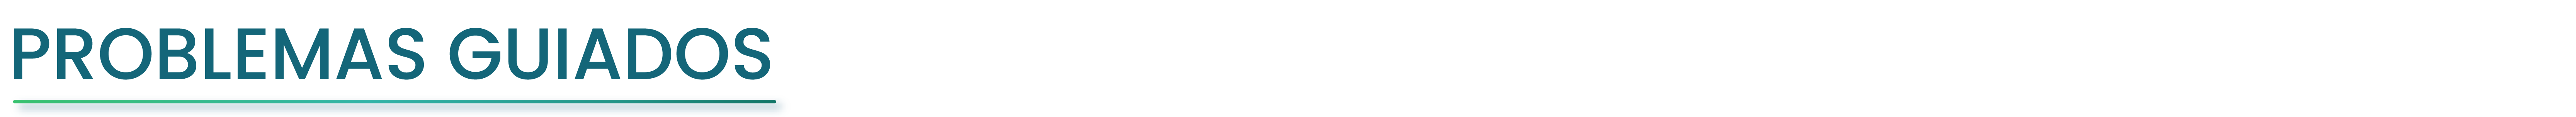

Como en los notebooks anteriores, se quiere contextualizar un problema y luego se presenta una serie de funciones de las librerias para ser usadas y resolver una serie de preguntas.

Un analista de la Superintendencia Nacional de Salud desea estudiar la evolución de los **valores finales de los procesos resueltos por año**. Para ello cuenta con una base de datos donde la columna `FECHA_RESOLUCION` (ya convertida a tipo `datetime64[ns]`) indica la fecha en que se resolvió cada caso, y la columna `VALOR_FINAL` refleja el valor económico del proceso.  
El analista requiere construir gráficos de línea que le permitan observar patrones y comunicar los resultados de manera clara y profesional.


## <font color='#2184A1'>Tabla de funciones para gráficos de línea</font>

| Función / Parámetro | Descripción |
|----------------------|-------------|
| `plt.plot(x, y)` | Crea un gráfico de línea simple |
| `linewidth` | Ajusta el grosor de la línea |
| `marker` | Define el marcador en cada punto de la línea |
| `color` | Cambia el color de la línea |
| `alpha` | Ajusta la transparencia de la línea |
| `label` | Asigna un nombre a la línea para mostrar en la leyenda |
| `plt.legend()` | Muestra la leyenda de los gráficos |
| `plt.title("...")` | Coloca un título al gráfico |
| `plt.xlabel("...")` | Etiqueta el eje X |
| `plt.ylabel("...")` | Etiqueta el eje Y |
| `plt.grid(True)` | Activa la cuadrícula de apoyo |


### <font color='#2184A1'>PROBLEMA 1</font>

1. El analista desea graficar la suma anual de `VALOR_FINAL`. Construya un gráfico de línea donde el eje X sea el año y el eje Y la suma de valores.  

2.  El analista considera que la línea es muy delgada. Modifique el gráfico anterior aumentando el grosor con el parámetro `linewidth=3`.  

3.  Para resaltar los puntos de cada año, agregue un marcador circular (`marker="o"`) en cada observación.  

4.  El analista quiere mejorar la visualización. Cambie el color de la línea a azul y ajuste la transparencia a `alpha=0.7`.  

5.  Ahora desea agregar un título descriptivo al gráfico y etiquetas a los ejes para que sea más comprensible.  

6.  El analista necesita mostrar más de una métrica. Además de la suma, grafique en la misma figura el **promedio anual de `VALOR_FINAL`**, usando otro color y marcador, y muestre la leyenda con `plt.legend()`.  

7.  Para una mejor lectura, active la cuadrícula del gráfico.  


**Nota**: Cada problema debe resolverse utilizando **únicamente las funciones y parámetros listados en la tabla**, aplicados sobre los datos de la base `df_alg.csv`.

---

Un analista de la Superintendencia Nacional de Salud desea comparar distintos indicadores de los procesos resueltos.  
En particular, quiere usar gráficos de barras, dispersión y subplots para comunicar de manera clara los hallazgos.  
La base de datos cuenta con las columnas `FECHA_RESOLUCION` (tipo `datetime64[ns]`) y `VALOR_FINAL` (valor económico).  


## <font color='#2184A1'>Tabla de funciones para gráficos de barras</font>

| Función / Parámetro | Descripción |
|----------------------|-------------|
| `plt.bar(x, height)` | Crea un gráfico de barras verticales |
| `plt.barh(y, width)` | Crea un gráfico de barras horizontales |
| `color` | Cambia el color de las barras |
| `alpha` | Ajusta la transparencia de las barras |
| `label` | Etiqueta las barras para la leyenda |
| `plt.legend()` | Muestra la leyenda |
| `plt.title("...")` | Coloca un título |
| `plt.xlabel("...")` | Etiqueta el eje X |
| `plt.ylabel("...")` | Etiqueta el eje Y |



### <font color='#2184A1'>PROBLEMA 2</font>

1. El analista desea conocer la **cantidad de procesos resueltos por año**. Construya un gráfico de barras verticales donde el eje X sea el año y el eje Y la cantidad de procesos.  
2. Para resaltar la información, cambie el color de las barras a verde.  
3. Ahora grafique las mismas cantidades pero en barras horizontales (`plt.barh`).  
4. Agregue un título y etiquetas a los ejes para que el gráfico sea más comprensible.  
5. Finalmente, compare en un mismo gráfico la **cantidad de procesos** y la **suma anual de valores**, usando `label` y mostrando la leyenda con `plt.legend()`.  
---

## <font color='#2184A1'>Tabla de funciones para gráficos de dispersión</font>

| Función / Parámetro | Descripción |
|----------------------|-------------|
| `plt.scatter(x, y)` | Crea un gráfico de dispersión |
| `color` | Cambia el color de los puntos |
| `marker` | Define el marcador de los puntos |
| `s` | Cambia el tamaño de los puntos |
| `alpha` | Ajusta la transparencia |
| `label` | Etiqueta los puntos para la leyenda |
| `plt.legend()` | Muestra la leyenda |
| `plt.title("...")` | Coloca un título |
| `plt.xlabel("...")` | Etiqueta el eje X |
| `plt.ylabel("...")` | Etiqueta el eje Y |


### <font color='#2184A1'>PROBLEMA 3</font>

1. El analista desea explorar la relación entre **el mes de resolución** y el **valor final** de los procesos. Construya un gráfico de dispersión donde el eje X sea el mes y el eje Y el valor.  
2. Cambie el color de los puntos a rojo y el marcador a triángulo (`marker="^"`).  
3. Ajuste el tamaño de los puntos (`s=50`) y agregue transparencia (`alpha=0.5`).  
4. Añada un título y etiquetas a los ejes.  
5. Ahora compare dos categorías en el mismo gráfico: procese los valores por **años pares** y **años impares**, muéstrelos con colores diferentes y muestre la leyenda con `plt.legend()`.  

---

## <font color='#2184A1'>Tabla de funciones para subplots</font>

| Función / Parámetro | Descripción |
|----------------------|-------------|
| `plt.subplot(nrows, ncols, index)` | Crea un subplot dentro de una cuadrícula |
| `plt.tight_layout()` | Ajusta los subplots para que no se traslapen |
| `plt.plot()` / `plt.bar()` / `plt.scatter()` | Se pueden usar dentro de cada subplot |
| `plt.title("...")` | Agrega un título al subplot |


### <font color='#2184A1'>PROBLEMA 4</font>

1. El analista desea mostrar dos perspectivas distintas: en un **subplot** graficar la **suma anual de valores** con `plt.plot`, y en otro la **cantidad de procesos por año** con `plt.bar`.  
2. Construya una cuadrícula de 1 fila y 2 columnas (`plt.subplot(1, 2, i)`).  
3. Agregue un título a cada subplot.  
4. Use `plt.tight_layout()` para mejorar la distribución de los gráficos.  
5. Finalmente, extienda a una cuadrícula de 2 filas y 2 columnas donde compare:  
   - Suma anual de valores (línea)  
   - Promedio anual (línea)  
   - Cantidad de procesos (barras)  
   - Dispersión mes vs valor (scatter)  


**Nota**: Cada problema debe resolverse utilizando **únicamente las funciones y parámetros listados en la tabla correspondiente**, aplicados sobre los datos de la base `df_alg.csv`.  

---

Un analista de la Superintendencia Nacional de Salud desea comprender la distribución de los valores económicos de los procesos.  
Para ello decide utilizar histogramas y diagramas de caja (boxplots), que permiten analizar la dispersión, concentraciones y presencia de valores atípicos en los datos de la columna `VALOR_FINAL`.  

## <font color='#2184A1'>Tabla de funciones para histogramas</font>

| Función / Parámetro | Descripción |
|----------------------|-------------|
| `plt.hist(x)` | Construye un histograma de la variable `x` |
| `bins` | Define el número de intervalos o clases |
| `color` | Cambia el color de las barras |
| `alpha` | Ajusta la transparencia |
| `edgecolor` | Define el color del borde de las barras |
| `label` | Etiqueta para mostrar en la leyenda |
| `plt.legend()` | Muestra la leyenda |
| `plt.title("...")` | Coloca un título |
| `plt.xlabel("...")` | Etiqueta el eje X |
| `plt.ylabel("...")` | Etiqueta el eje Y |


### <font color='#2184A1'>PROBLEMA 5</font>

1. El analista desea construir un histograma de la variable `VALOR_FINAL` para observar cómo se distribuyen los montos.  
2. Modifique el histograma utilizando `bins=20` para mayor detalle.  
3. Cambie el color de las barras a naranja y los bordes a negro (`edgecolor="black"`).  
4. Ajuste la transparencia (`alpha=0.6`) para mejorar la visualización.  
5. Agregue título y etiquetas a los ejes.  
6. Construya dos histogramas en la misma figura: uno para los valores de años pares y otro para los valores de años impares, diferenciados por color y con `plt.legend()`.  

---
## <font color='#2184A1'>Tabla de funciones para boxplots</font>

| Función / Parámetro | Descripción |
|----------------------|-------------|
| `plt.boxplot(x)` | Construye un diagrama de caja para la variable `x` |
| `vert` | Define si la caja es vertical (`True`) u horizontal (`False`) |
| `patch_artist=True` | Permite colorear las cajas |
| `boxprops` | Define propiedades de color y estilo de la caja |
| `medianprops` | Define propiedades de la línea de la mediana |
| `labels` | Asigna etiquetas a las cajas |
| `plt.title("...")` | Coloca un título |
| `plt.xlabel("...")` | Etiqueta el eje X |
| `plt.ylabel("...")` | Etiqueta el eje Y |


### <font color='#2184A1'>PROBLEMA 6</font>

1. El analista desea visualizar la dispersión de `VALOR_FINAL` con un diagrama de caja simple.  
2. Cambie la orientación del boxplot a horizontal (`vert=False`).  
3. Coloree la caja usando `patch_artist=True` y ajuste el color con `boxprops`.  
4. Resalte la mediana cambiando su color a rojo con `medianprops`.  
5. Agregue título y etiquetas a los ejes.  
6. Ahora construya un boxplot comparativo con dos grupos: valores de años pares y valores de años impares, asignando etiquetas con `labels=["Años Pares","Años Impares"]`.  


**Nota**: Cada problema debe resolverse utilizando **únicamente las funciones y parámetros listados en la tabla correspondiente**, aplicados sobre los datos de la base `df_alg_clean.csv`.  

---


Un analista de la Superintendencia Nacional de Salud debe preparar un **informe ejecutivo** sobre la dinámica de los procesos resueltos. Para ello, integrará varios tipos de gráficos (líneas, barras, histogramas, boxplots y subplots) con el fin de responder preguntas de tendencia, comparación, distribución y variabilidad. La base contiene `FECHA_RESOLUCION` (tipo `datetime64[ns]`), `VALOR_FINAL`, `TIPO_ACCION`, `TIPO_SANCION` y `DANE_DEP`. El objetivo es construir una narrativa visual coherente que permita comunicar hallazgos a audiencias no técnicas.


## <font color="#2184A1">Tabla de funciones para el proyecto integrador</font>

| Función / Parámetro | Uso |
|---|---|
| `plt.plot(x, y, linewidth, marker, alpha, label)` | Tendencias en el tiempo (línea) |
| `plt.bar(x, height)` / `plt.barh(y, width)` | Comparaciones entre categorías (barras) |
| `plt.hist(x, bins, alpha, edgecolor)` | Distribución de valores (histograma) |
| `plt.boxplot(x, vert, patch_artist, boxprops, medianprops, labels)` | Dispersión y outliers (boxplot) |
| `plt.subplots(nrows, ncols, sharex, sharey)` | Disposición de paneles (subplots) |
| `ax.twinx()` | Doble escala en un mismo panel (con cautela interpretativa) |
| `plt.title()` / `plt.xlabel()` / `plt.ylabel()` | Rotulación y contexto |
| `plt.legend()` | Diferenciación de series/categorías |
| `plt.grid(True)` | Lectura de magnitudes |
| `plt.tight_layout()` | Evitar solapes |
| `plt.xticks(rotation=…)` | Legibilidad en ejes temporales |
| **Reglas de datos** | Construir series mensuales: `FECHA_RESOLUCION.dt.to_period("M").to_timestamp("M")`; agregaciones: `sum`, `count`, `mean`; top-k categorías: `groupby().sum().sort_values().head(k)` |



### <font color="#2184A1">PROBLEMA 1 — Narrativa de tendencia (línea)</font>

1. Construye la serie **mensual** de la suma de `VALOR_FINAL` y grafícala con línea, ajustando `linewidth`, `marker` y `alpha`.  
2. Añade título, ejes y cuadrícula; rota 45° las etiquetas del eje X.  
3. Incorpora en la misma figura el **conteo mensual de resoluciones** (normalizado a \[0,1\] o mediante `twinx()`), con `label` y `plt.legend()`.  
4. Anota el **mes de máximo valor** con `ax.annotate` (flecha y texto con el valor).



### <font color="#2184A1">PROBLEMA 2 — Comparación entre categorías (barras)</font>

1. Identifica las **5 acciones (`TIPO_ACCION`)** con mayor `VALOR_FINAL` total (suma anual o global) y grafícalas en **barras horizontales**.  
2. Agrega valores encima/de lado de cada barra (texto simple) y ordena de mayor a menor.  
3. Repite el gráfico por **año** (barras agrupadas: eje X = acción, una barra por año) y comenta el cambio relativo entre años.



### <font color="#2184A1">PROBLEMA 3 — Distribución y valores atípicos (histograma + boxplot)</font>

1. Grafica un **histograma** de `VALOR_FINAL` con `bins` finos (p. ej., 20) y `edgecolor="black"`; discute si la escala es adecuada.  
2. Construye un **boxplot** horizontal de `VALOR_FINAL` para detectar outliers; resalta la mediana y cambia el color de la caja.  
3. Separa `VALOR_FINAL` en **años pares vs. impares** y crea un **boxplot comparativo** con `labels`. Comenta diferencias de mediana y rango intercuartílico.



### <font color="#2184A1">PROBLEMA 4 — Panel departamental (subplots 2×2)</font>

1. Selecciona los **4 `DANE_DEP`** con mayor suma total de `VALOR_FINAL`.  
2. Para cada departamento, construye la **serie mensual** de `VALOR_FINAL` y grafícala en una cuadrícula **2×2** (líneas).  
3. Asegura `sharex=True` y títulos por panel, más un `suptitle` general.  
4. Concluye con un breve comentario comparando perfiles (picos, persistencia, volatilidad).



### <font color="#2184A1">PROBLEMA 5 — Patrones por tipo de sanción (mosaico 2×2)</font>

1. Toma las **4 `TIPO_SANCION`** más frecuentes.  
2. Para cada sanción, grafica un **histograma** de `VALOR_FINAL` en un mosaico **2×2**, con `bins` homogéneos y transparencia (`alpha`) para legibilidad.  
3. Ajusta títulos por panel y añade un comentario sobre diferencias de asimetría o concentración.



### <font color="#2184A1">PROBLEMA 6 — Resumen ejecutivo (una figura, tres paneles)</font>

1. Crea una figura con **3 subplots en columna (3×1)**:  
   - **Arriba:** línea de `VALOR_FINAL` mensual (tendencia).  
   - **Centro:** barras de **top-5 `TIPO_ACCION`** por monto total.  
   - **Abajo:** boxplot horizontal de `VALOR_FINAL` por años pares vs. impares.  
2. Usa títulos claros, etiquetas de ejes, `tight_layout()` y, cuando corresponda, `legend()`.  
3. Redacta una **conclusión breve** con 2–3 hallazgos clave (pico temporal, concentración por acción y presencia de outliers).



### <font color="#2184A1">PROBLEMA 7 — Sensibilidad visual (estilos y escalas)</font>

1. Repite la línea del Problema 1 con **cuatro estilos** (`'-'`, `'--'`, `'-.'`, `':'`) en un mosaico **2×2**, mismo rango temporal.  
2. Grafica `VALOR_FINAL` mensual en **escala logarítmica** y compara con escala lineal (dos figuras separadas).  
3. Discute cómo la **elección de estilo y escala** altera la percepción de variabilidad y picos.



### <font color="#2184A1">PROBLEMA 8 — Historia comparada (dos periodos, 1×2)</font>

1. Divide el rango temporal en dos mitades y grafica en **1×2** la línea de `VALOR_FINAL` mensual; comparte eje Y.  
2. Añade un subtítulo por panel con el rango de fechas de cada periodo.  
3. Concluye si el segundo periodo muestra **recuperación, estabilidad o deterioro** frente al primero.




**Nota**: Cada problema se resuelve con las **funciones listadas en la tabla** y datos de `df_alg_clean.csv`. Se recomienda: construir previamente agregaciones mensuales (`to_period("M").to_timestamp("M")`), top-k por categorías (`groupby().sum().sort_values()`), y aplicar rotulación consistente (títulos, ejes, leyendas y cuadrícula).  

---


Un analista de la Superintendencia Nacional de Salud desea mejorar la **comunicación visual** de sus hallazgos incorporando las funciones de la librería **Seaborn**, que permiten crear gráficos más estilizados y facilitar la interpretación de patrones en los datos de sanciones y resoluciones. A continuación, se presentan cinco ejercicios prácticos donde se aplican funciones de Seaborn con la base `df_alg_clean`.

## <font color="#2184A1">Tabla de funciones de Seaborn</font>

| Función | Uso principal |
|---|---|
| `sns.lineplot(data, x, y, hue, style, markers)` | Serie temporal o tendencias |
| `sns.barplot(data, x, y, hue, estimator)` | Comparaciones promedio/suma por categoría |
| `sns.histplot(data, x, bins, hue, kde)` | Distribución de frecuencias (con o sin densidad) |
| `sns.boxplot(data, x, y, hue)` | Identificar outliers y diferencias entre categorías |
| `sns.scatterplot(data, x, y, hue, size, style)` | Relación entre dos variables (dispersión) |
| Extras: `sns.set_theme(style="whitegrid")`, `plt.xticks(rotation=…)`, `sns.despine()` | Estética y estilo |


### <font color="#2184A1">PROBLEMA 1</font>

1. Construir una serie mensual con `FECHA_RESOLUCION.dt.to_period("M")`.  
2. Graficar la tendencia de `VALOR_FINAL` usando `sns.lineplot`, con marcador y estilo por año.  
3. Incluir título, rotar el eje X y comentar el mes con mayor valor.


### <font color="#2184A1">PROBLEMA 2</font>

1. Seleccionar las **5 acciones (`TIPO_ACCION`)** con mayor monto total.  
2. Usar `sns.barplot` con `x=TIPO_ACCION`, `y=VALOR_FINAL`, `estimator=sum`.  
3. Ordenar las barras de mayor a menor y añadir etiquetas de valores sobre las barras.


### <font color="#2184A1">PROBLEMA 3</font>

1. Graficar un histograma de `VALOR_FINAL` con `sns.histplot`, estableciendo `bins=20` y `edgecolor`.  
2. Incluir la curva de densidad (`kde=True`) para visualizar la concentración de valores.  
3. Comparar la distribución de valores según `TIPO_SANCION` (colorear con `hue`).


### <font color="#2184A1">PROBLEMA 4 — Boxplots por año</font>

1. Extraer el año de `FECHA_RESOLUCION` (`.dt.year`).  
2. Construir un `sns.boxplot` con `x=año` y `y=VALOR_FINAL`.  
3. Analizar qué años presentan mayor dispersión y valores atípicos.


### <font color="#2184A1">PROBLEMA 5 — Relación entre valor final y año</font>

1. Crear un `sns.scatterplot` con `x=año` y `y=VALOR_FINAL`.  
2. Diferenciar los puntos según `TIPO_ACCION` con el parámetro `hue`.  
3. Evaluar si existe alguna acción con tendencia creciente en los valores a lo largo del tiempo.


**Nota**: Cada ejercicio debe resolverse empleando exclusivamente funciones de **Seaborn** listadas en la tabla, cuidando la estética con `sns.set_theme()` y `plt.xticks(rotation=45)` cuando sea necesario.  

---

Un analista de la Superintendencia Nacional de Salud desea organizar la información visual en una misma figura para facilitar comparaciones entre variables. Para ello, requiere aprender a manejar la función `subplots` de Matplotlib, la cual permite construir varias gráficas dentro de un mismo lienzo.


## <font color="#2184A1">Tabla de funciones para Subplots</font>

| Función / Parámetro | Descripción |
|----------------------|-------------|
| `fig, ax = plt.subplots(nrows, ncols, figsize=(...))` | Crea una figura con varias gráficas (filas y columnas) |
| `ax[i].plot(...)` | Dibuja un gráfico en un subplot específico |
| `ax[i].set_title("...")` | Coloca un título en cada subplot |
| `ax[i].set_xlabel("...")` | Etiqueta eje X de un subplot |
| `ax[i].set_ylabel("...")` | Etiqueta eje Y de un subplot |
| `plt.tight_layout()` | Ajusta automáticamente los espacios entre subplots |
| `sharex`, `sharey` | Comparte ejes X o Y entre subplots |


### <font color="#2184A1">PROBLEMA 1</font>

1. Calcular la suma y el promedio de `VALOR_FINAL` por año.  
2. Crear una figura con **2 subplots en 1 fila** (`nrows=1, ncols=2`).  
3. En el primer subplot graficar la **suma anual** y en el segundo el **promedio anual**.  
4. Colocar título en cada subplot y ajustar con `plt.tight_layout()`.  


### <font color="#2184A1">PROBLEMA 2</font>

1. Agrupar `VALOR_FINAL` por mes y año de `FECHA_RESOLUCION`.  
2. Crear **2 filas y 1 columna de subplots** (`nrows=2, ncols=1`).  
3. En el primer subplot graficar la serie de **2020**, y en el segundo la de **2021**.  
4. Etiquetar los ejes y añadir títulos diferenciados.  


### <font color="#2184A1">PROBLEMA 3</font>

1. Seleccionar las 2 categorías de `TIPO_SANCION` más frecuentes.  
2. Construir un **grid de 2x2 subplots**.  
3. Graficar en cada subplot un histograma (`plt.hist`) de `VALOR_FINAL` según la categoría seleccionada.  
4. Añadir título en cada subplot e incluir una etiqueta de eje Y común (`sharey=True`).  


### <font color="#2184A1">PROBLEMA 4</font>

1. Seleccionar las 4 acciones más frecuentes en `TIPO_ACCION`.  
2. Crear un **grid de 2x2 subplots**.  
3. Graficar en cada subplot la evolución anual del `VALOR_FINAL` para cada acción.  
4. Colocar títulos con el nombre de la acción y uniformar los ejes con `sharex=True` y `sharey=True`.  


**Nota**: Cada problema debe resolverse utilizando únicamente las funciones y parámetros listados en la tabla, aplicados sobre la base `df_alg.csv`.  

---

Un analista de la Superintendencia Nacional de Salud desea explorar **relaciones** entre variables numéricas de la base `df_alg_clean.csv`. En particular, necesita identificar si existen asociaciones entre el **tiempo** (mes/año de resolución) y los **valores económicos** de los procesos (`VALOR_FINAL`), así como comparar patrones por categorías (`TIPO_ACCION`, `TIPO_SANCION`).


## <font color="#2184A1">Tabla de funciones para gráficos de dispersión</font>

| Función / Parámetro | Descripción |
|---|---|
| `plt.scatter(x, y)` | Muestra puntos (x,y) para explorar relaciones |
| `s` | Tamaño de los puntos |
| `marker` | Forma del marcador (`'o'`, `'^'`, `'s'`, etc.) |
| `alpha` | Transparencia de los puntos (0–1) |
| `label` | Etiqueta para leyenda |
| `plt.legend()` | Muestra la leyenda |
| `plt.title()`, `plt.xlabel()`, `plt.ylabel()` | Rotulación del gráfico |
| `plt.grid(True)` | Activa la cuadrícula |
| `plt.xticks(rotation=…)` | Rota etiquetas del eje X (si aplica) |


### <font color="#2184A1">Problemas dispersión</font>

1. El analista desea observar la relación entre **mes de resolución** y **`VALOR_FINAL`**. Construye un `scatter` con `x=MES` y `y=VALOR_FINAL`; agrega `alpha=0.5`.
2. Considera que hay solape de puntos. Incrementa `s` (tamaño) y modifica `marker` a triángulo (`'^'`); añade título y etiquetas de ejes.
3. Diferencia los puntos por **años pares vs. impares** (crear dos llamadas `plt.scatter`, con `label` distinto) y muestra la leyenda.
4. Repite el análisis con **dos categorías** de `TIPO_SANCION` (las más frecuentes); compara dispersiones visualmente.
5. Activa cuadrícula y rota etiquetas si el eje X es temporal agregado (p. ej., `FECHA_MES`).
6. Extra: identifica visualmente **meses outlier** de `VALOR_FINAL` (picos inusuales) y anota dos de ellos con texto breve.
---

Un analista de la Superintendencia Nacional de Salud desea caracterizar la **distribución** de los valores económicos de los procesos. Para ello aplicará **histogramas**, que permiten ver la forma (asimetría), concentración y colas de `VALOR_FINAL`. Trabajará con `df_alg_clean.csv`, donde las fechas ya fueron convertidas a `datetime64[ns]`.


## <font color="#2184A1">Tabla de funciones para histogramas</font>

| Función / Parámetro | Descripción |
|---|---|
| `plt.hist(x)` | Crea el histograma de la variable `x` |
| `bins` | Número de clases/intervalos |
| `alpha` | Transparencia de barras |
| `edgecolor` | Color del borde de cada barra |
| `density` | Normaliza el área a 1 (densidad) |
| `plt.title()`, `plt.xlabel()`, `plt.ylabel()` | Rotulación del gráfico |


### <font color="#2184A1">Problemas histogramas</font>

1. El analista desea un histograma básico de `VALOR_FINAL` con `bins=10`.
2. Ajusta `bins=20`, `alpha=0.7` y `edgecolor='black'` para mayor legibilidad; agrega título y etiquetas.
3. Compara **años pares vs. impares** en la misma figura (dos llamadas a `plt.hist` con `alpha` distinto) y comenta diferencias de cola/centro.
4. Construye un histograma en **densidad** (`density=True`); explica qué representa la escala del eje Y en este caso.
5. Selecciona la **`TIPO_SANCION`** más frecuente y graficar el histograma de `VALOR_FINAL` solo para esa categoría; discute si la forma difiere del total.
6. Extra: experimenta con un **recorte de outliers** (p. ej., limitar a percentil 99) y repite el histograma para ver cómo cambia la forma.

---


Un analista de la Superintendencia Nacional de Salud debe realizar **comparaciones categóricas** (por `ANIO`, `TIPO_ACCION`, `TIPO_SANCION`, `DANE_DEP`). Para una comunicación clara, utilizará **gráficos de barras** con agregaciones (conteos o sumas) sobre `df_alg_clean.csv`.

## <font color="#2184A1">Tabla de funciones para barras</font>

| Función / Parámetro | Descripción |
|---|---|
| `plt.bar(x, height)` | Barras verticales (comparación por categoría) |
| `plt.barh(y, width)` | Barras horizontales (útil para etiquetas largas) |
| `alpha` | Transparencia |
| `label` | Nombre de serie para leyenda |
| `plt.legend()` | Muestra la leyenda |
| `plt.title()`, `plt.xlabel()`, `plt.ylabel()` | Rotulación |
| `plt.xticks(rotation=…)` | Rotación de categorías en X |


### <font color="#2184A1">Problemas barras</font>

1. El analista requiere el **conteo de procesos por `ANIO`** en barras verticales; agrega título y ejes.
2. Repite el conteo en **barras horizontales** (`barh`) y discute cuál mejora la legibilidad en tu caso.
3. Calcula la **suma anual de `VALOR_FINAL`** y grafícala en barras (ordenada de menor a mayor valor para resaltar diferencias).
4. Compara en la **misma figura** el conteo y la suma anual (dos series con `label` y `plt.legend()`); explica el reto de escalas y una posible solución (normalizar una serie).
5. Selecciona el **Top-10 `DANE_DEP`** por suma total de `VALOR_FINAL` y grafícalo en `barh` (rotulación clara).
6. Extra: agrega **etiquetas de valor** sobre cada barra (texto simple con las magnitudes) y discute buenas prácticas de redondeo.

---


Un analista de la Superintendencia Nacional de Salud necesita evaluar **dispersión** y **valores atípicos** en `VALOR_FINAL`. Usará **diagramas de caja** (boxplots) para comparar por año, tipo de sanción o acción, utilizando `df_alg_clean.csv`.

## <font color="#2184A1">Tabla de funciones para boxplots</font>

| Función / Parámetro | Descripción |
|---|---|
| `plt.boxplot(x)` | Crea un boxplot para datos numéricos |
| `vert` | Orientación: vertical (`True`) u horizontal (`False`) |
| `patch_artist=True` | Permite colorear las cajas |
| `boxprops`, `medianprops` | Estilo de caja y mediana |
| `labels` | Etiquetas de cada caja |
| `plt.title()`, `plt.xlabel()`, `plt.ylabel()` | Rotulación |


### <font color="#2184A1">Problemas boxplots</font>

1. El analista construye un **boxplot simple** de `VALOR_FINAL` (una sola caja), con título y ejes.
2. Cambia a **orientación horizontal** (`vert=False`) y ajusta `patch_artist=True` para colorear la caja; resalta la mediana con `medianprops`.
3. Compara **años pares vs. impares** en un boxplot con dos cajas (`labels=['Pares','Impares']`); comenta mediana y rango intercuartílico.
4. Realiza un boxplot comparativo para las **3 `TIPO_ACCION`** con mayor monto total (tres cajas con `labels`).
5. Repite el boxplot de (3) tras **recortar outliers extremos** (por percentil 99) y discute cómo cambia la lectura.
6. Extra: añade un subtítulo que aclare el criterio de outliers para transparencia metodológica.

---

Un analista de la Superintendencia Nacional de Salud desea visualizar **tablas cruzadas** de magnitudes (por ejemplo, suma de `VALOR_FINAL` por **año** y **tipo de acción**). Para ello, construirá una **tabla pivote** y la representará como **mapa de calor**, facilitando la identificación de patrones y “zonas calientes”.


## <font color="#2184A1">Tabla de funciones para mapas de calor</font>

| Función / Parámetro | Descripción |
|---|---|
| `plt.imshow(M, aspect='auto')` | Muestra una matriz como imagen |
| `plt.colorbar()` | Añade barra de color (leyenda de intensidades) |
| `cmap` | Mapa de colores (p. ej., `'viridis'`, `'plasma'`) |
| `plt.xticks(ticks, labels, rotation=…)` | Etiquetas de columnas |
| `plt.yticks(ticks, labels)` | Etiquetas de filas |
| `plt.title()`, `plt.xlabel()`, `plt.ylabel()` | Rotulación |
| **Previo** | Crear **tabla pivote** (p. ej., filas=`ANIO`, columnas=`TIPO_ACCION`, valores=`sum(VALOR_FINAL)`) |


### <font color="#2184A1">Problemas heatmap</font>

1. El analista genera una **tabla pivote** con filas=`ANIO`, columnas=`TIPO_ACCION` y valores=`sum(VALOR_FINAL)`; completa `NaN` con 0.
2. Muestra la matriz con `plt.imshow(..., aspect='auto')` y añade `plt.colorbar()`; agrega título y ejes.
3. Define etiquetas legibles para ticks de X (acciones) y Y (años) con `plt.xticks`/`plt.yticks` (rotación si es necesario).
4. Cambia el **mapa de color** (`cmap`) y discute cómo afecta la interpretación (contraste, foco en máximos).
5. Repite el heatmap usando una **normalización por filas** (p. ej., dividir cada fila por su suma) y explica por qué puede ser útil para comparar años.
6. Extra: crea una pivote alternativa con **conteo** de resoluciones (en lugar de suma) y compara patrones con el heatmap de montos.
